In [47]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Analytics/Metrics
import pandas as pd
from wordcloud import WordCloud

# Colormap
import matplotlib.colors

In [48]:
# variables

#=========================#
# data
#=========================#

# Input data filepath
RAW_DIRNAME = "data/"
categories = ['Entertainment', 'Business', 'Health', 'Science.Technology']


#=========================#
# wordcloud params
#=========================#

# Field with text to generate wordcloud
TEXT_FIELD = "clean_title"
# Output filepath for wordcloud
WORDCLOUD_OUTPUT_DIRNAME = "wordclouds/"

## Word Frequencies

This method is to create data when you just want to make up the words/sizes of words on a wordcloud.

In [49]:
# This cell is here if you want to make up your own words and word sizes manually.

# # Custom data to create a word cloud
# words_list = ['embedding', 'language model', 'semantic', 'token', 'words', 'meaning', 'doc2vec', 'word2vec', 'fasttext', 'gpt', 'learning', 'search', 'similarity']
# frequency_list = [55,10,33,20,12, 26, 30, 30, 30, 15, 20, 20, 20]

# df = pd.DataFrame()

# df['Word'] = words_list
# df['Frequency'] = frequency_list

This method uses a corpus that is written in a file.

In [50]:
# Input data
category = categories[0]
filename = f"{category}_wordcloud_data.csv"

# Pull in the data from the csv file
df = pd.read_csv(str(RAW_DIRNAME)+str(filename))

# Record the date/time for wordcloud naming
now = datetime.now().strftime("%Y.%m.%d_%H.%M")
# Name the wordcloud output file
WORDCLOUD_OUTPUT_FILENAME = f"{category}_wordcloud{now}.png"

This code multiplies a word by the number of times it is seen in the corpus.  This is done to adjust the size of the words on the wordcloud.

In [51]:
# Multiply a word by the number of times it is seen in the corpus

GLOBAL_STRING = ""
for i in range(0, len(df)):
    string = df['Word'][i]
    number_of_times = df['Frequency'][i]
    for i in range(0,number_of_times):
        GLOBAL_STRING += string + " "

## Generate Word Cloud

### Assign a color map

In [52]:
# List of "Chevron" blue colors
color_map = ["#111D45", "#0B2D71", "#064A91", "#0066B2", "#0081C5"]

# List of Red/Orange/Yellow colors
# color_map = ["#740001", "#ae0001", "#eeba30", "#d3a625", "#000000"]

# Create the custom color map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color_map)

Word Cloud generated for Entertainment


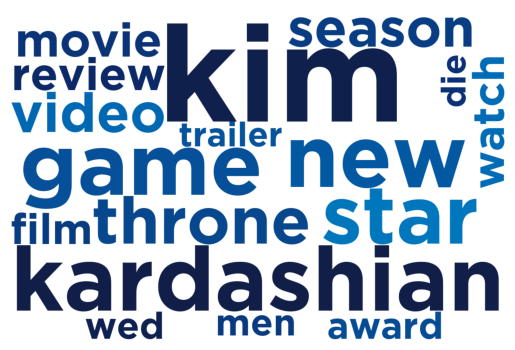

In [53]:
# Generate Word Cloud
wc = WordCloud(background_color='white', 
               font_path = "src/Gotham-Bold.otf",
               contour_width = 2,
               width = 1200, 
               height = 800,
               collocations=False,
               colormap = cmap).generate(GLOBAL_STRING)
print(f"Word Cloud generated for {category}")
plt.axis("off")
plt.imshow(wc)

In [54]:
# Save word cloud to file
wc.to_file(str(WORDCLOUD_OUTPUT_DIRNAME)+str(WORDCLOUD_OUTPUT_FILENAME))